In [24]:
import pandas as pd
import seaborn as sns
import numpy as np

## Вводим данные

In [25]:
df = pd.read_excel('data/data.xlsx', header=0).iloc[1::, :9]
df.head(3)

,Добыча сырой нефти и природного газа; предоставление услуг в этих областях,№ п.п.,Прибыль (убыток),Долгосрочные обязательства,Краткосрочные обязательства,Оборотные активы,Основные средства,Дебиторская задолженность (краткосрочная),Запасы готовой продукции и товаров для перепродажи
1,"Аганнефтегазгеология, открытое акционерное общ...",1.0,1440075,61749,1007355,4920199,5165712,3490541,31365
2,"Азнакаевский горизонт, открытое акционерное об...",2.0,5146,17532,58110,50798,19595,23014,0
3,"Акмай, Открытое акционерное общество",3.0,13612,20268,51271,18903,81072,8678,84


In [26]:
df = pd.merge(df.iloc[::, :2], df.iloc[::, 1:].astype(np.float64), 'left', '№ п.п.')

## Диаграммы рассеивания

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 9 columns):
 #   Column                                                                      Non-Null Count  Dtype  
---  ------                                                                      --------------  -----  
 0   Добыча сырой нефти и природного газа; предоставление услуг в этих областях  54 non-null     object 
 1   № п.п.                                                                      54 non-null     float64
 2   Прибыль (убыток)                                                            54 non-null     float64
 3   Долгосрочные обязательства                                                  54 non-null     float64
 4   Краткосрочные обязательства                                                 54 non-null     float64
 5   Оборотные активы                                                            54 non-null     float64
 6   Основные средства                                    

<Axes: >

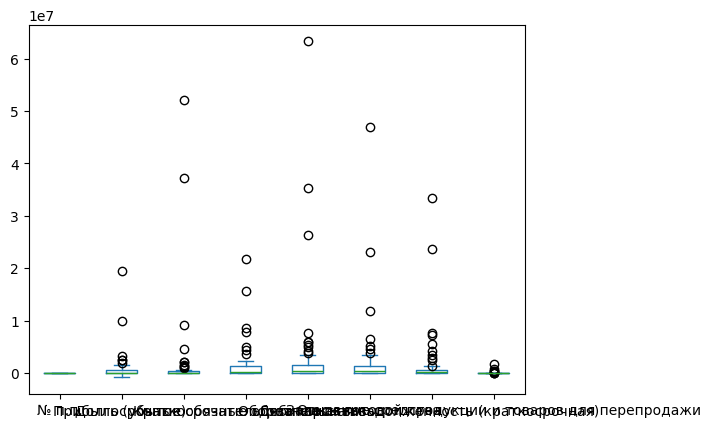

In [28]:
df.plot.box()

In [29]:
filtered_df = df[(df.iloc[::, 2:] < df.iloc[::, 2:].quantile(.75)) & (df.iloc[::, 2:] > df.iloc[::, 2:].quantile(.25))]
filtered_df

,Добыча сырой нефти и природного газа; предоставление услуг в этих областях,№ п.п.,Прибыль (убыток),Долгосрочные обязательства,Краткосрочные обязательства,Оборотные активы,Основные средства,Дебиторская задолженность (краткосрочная),Запасы готовой продукции и товаров для перепродажи
0,NaN,NaN,NaN,61749.0,1007355.0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,17532.0,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,13612.0,20268.0,NaN,NaN,81072.0,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,28973.0,NaN,NaN,367880.0,NaN,204181.0,19474.0
6,NaN,NaN,NaN,311268.0,NaN,NaN,740437.0,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,628091.0,214411.0,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,29204.0,NaN,738811.0,705877.0,269908.0,NaN,NaN


<Axes: >

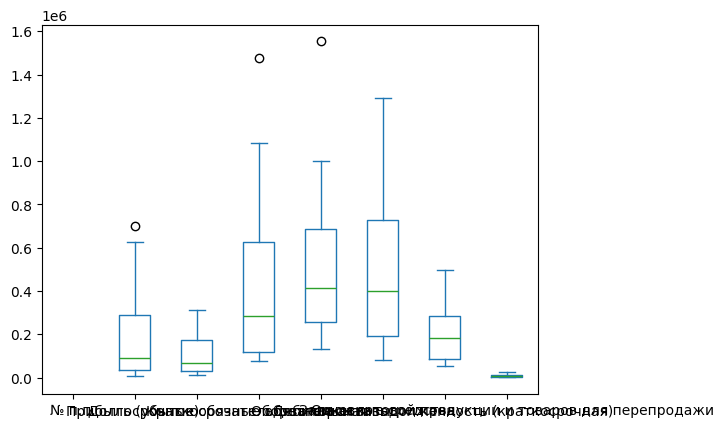

In [30]:
filtered_df.plot.box()

In [31]:
filtered_df.mean()

Добыча сырой нефти и природного газа; предоставление услуг в этих областях              NaN
№ п.п.                                                                                  NaN
Прибыль (убыток)                                                              183718.038462
Долгосрочные обязательства                                                    105037.192308
Краткосрочные обязательства                                                   416335.961538
Оборотные активы                                                              516944.730769
Основные средства                                                             502785.692308
Дебиторская задолженность (краткосрочная)                                     211756.961538
Запасы готовой продукции и товаров для перепродажи                                   8267.0
dtype: object

<Axes: >

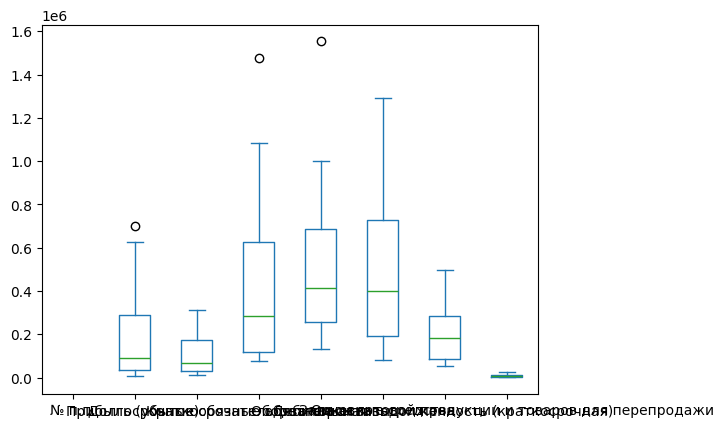

In [32]:
#filtered_df.fillna(filtered_df.median(), inplace=True)
filtered_df.plot.box()

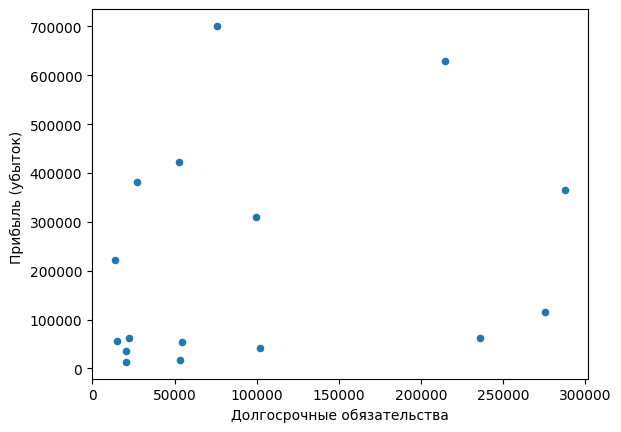

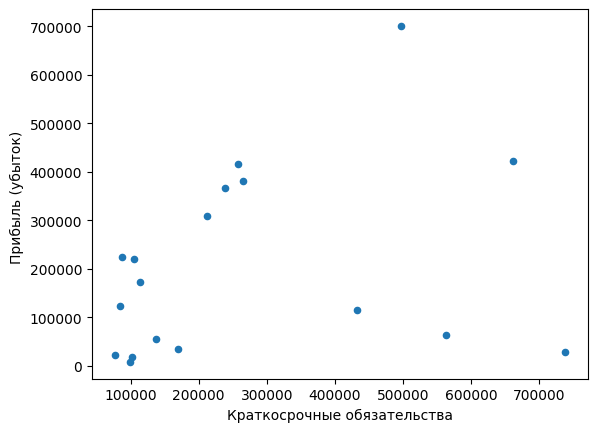

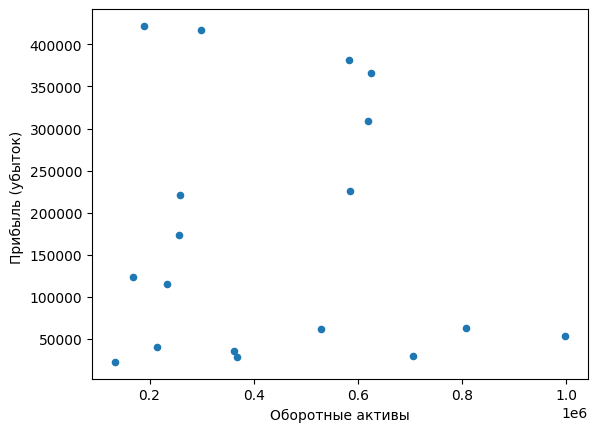

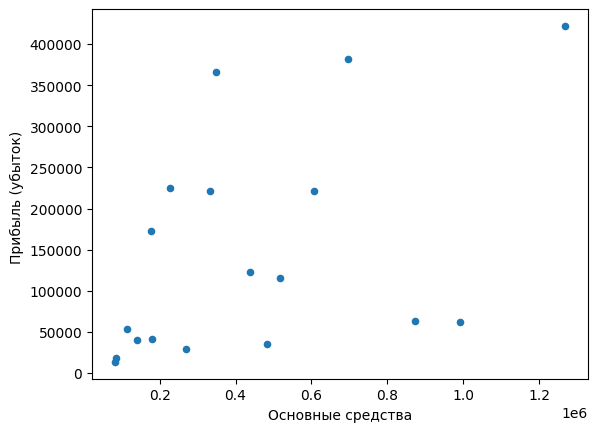

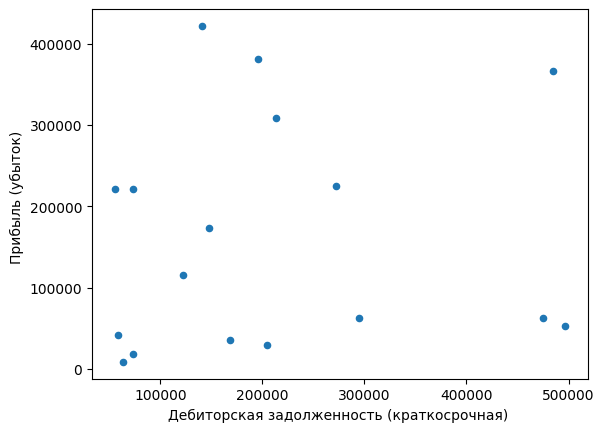

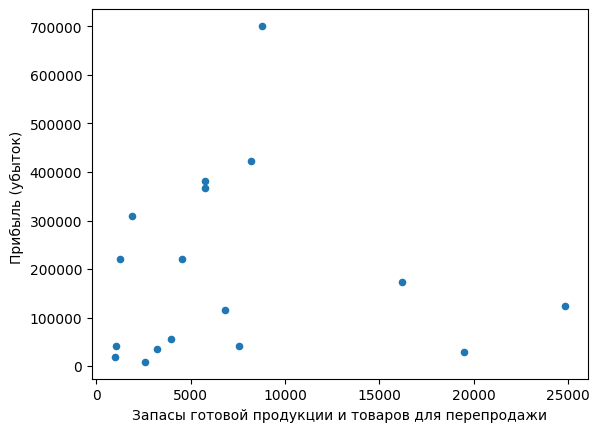

In [33]:
for i in filtered_df.columns.values.tolist()[3:]:
    filtered_df.plot.scatter(i, 'Прибыль (убыток) ')

In [34]:
filtered_df.iloc[::, 2:].corr()

,Прибыль (убыток),Долгосрочные обязательства,Краткосрочные обязательства,Оборотные активы,Основные средства,Дебиторская задолженность (краткосрочная),Запасы готовой продукции и товаров для перепродажи
Прибыль (убыток),1.000000,0.228544,0.278156,-0.065984,0.469346,0.076769,0.007700
Долгосрочные обязательства,0.228544,1.000000,0.096857,-0.072591,0.065665,0.227763,-0.116098
Краткосрочные обязательства,0.278156,0.096857,1.000000,0.760257,0.316517,0.289627,0.250552
Оборотные активы,-0.065984,-0.072591,0.760257,1.000000,0.032164,0.512987,0.217794
Основные средства,0.469346,0.065665,0.316517,0.032164,1.000000,0.169363,0.081572
Дебиторская задолженность (краткосрочная),0.076769,0.227763,0.289627,0.512987,0.169363,1.000000,0.519615
Запасы готовой продукции и товаров для перепродажи,0.007700,-0.116098,0.250552,0.217794,0.081572,0.519615,1.000000


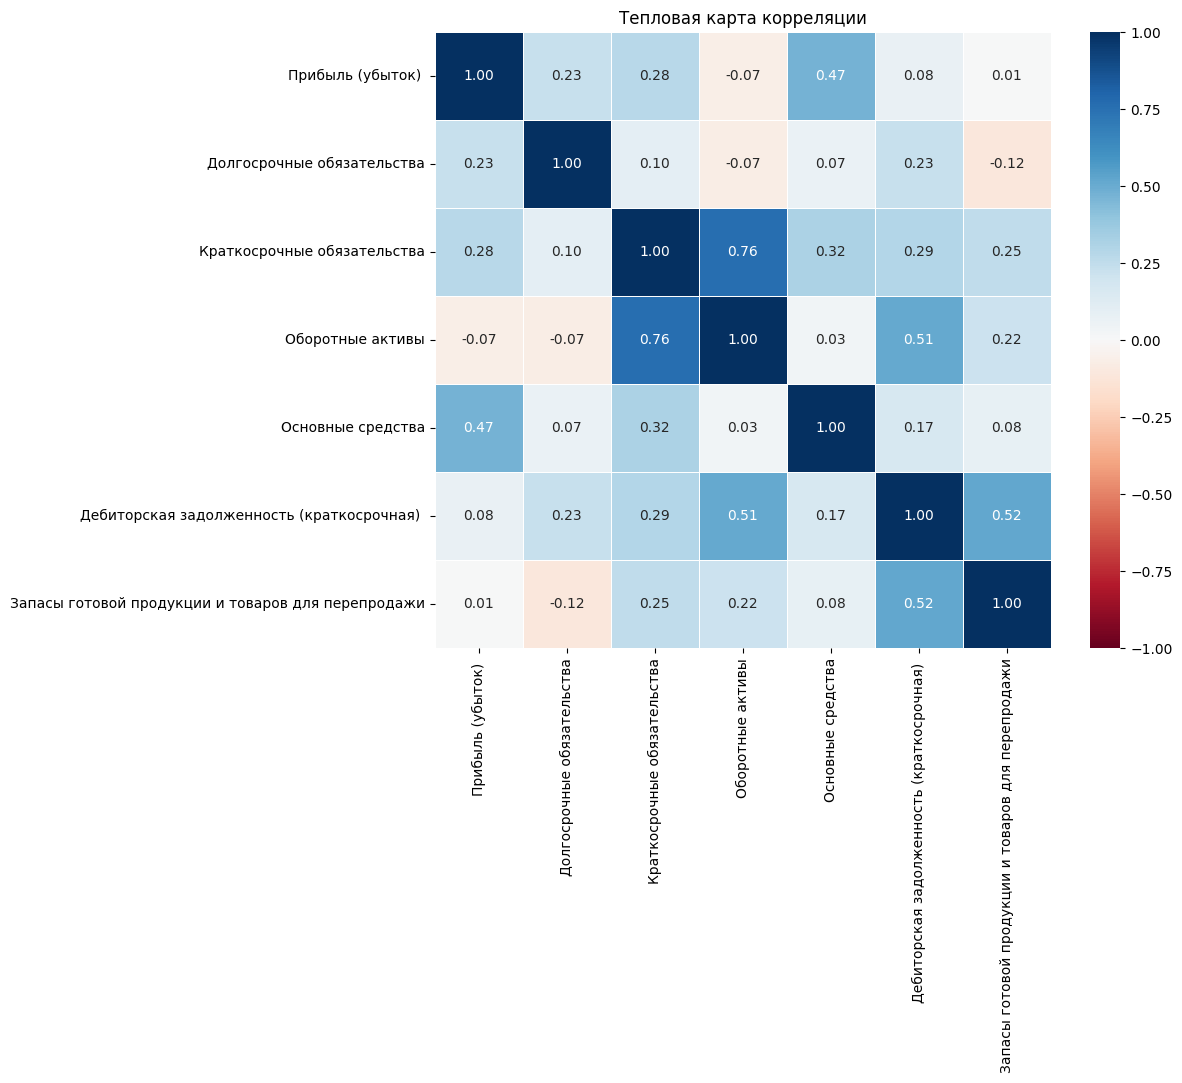

In [35]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(filtered_df.iloc[::, 2:].corr(), annot=True, fmt=".2f", cmap="RdBu", vmin=-1, vmax=1, center=0, square=True, linewidths=.5, ax=ax)
plt.title("Тепловая карта корреляции")
plt.show()

## Регрессия

## Медианные значения

In [36]:
for_gr_df = filtered_df.fillna(filtered_df.median())
for_gr_df

/var/folders/kt/3wcg_rq11l33nyc3g98z7zlw0000gn/T/ipykernel_78795/1565789322.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  for_gr_df = filtered_df.fillna(filtered_df.median())


,Добыча сырой нефти и природного газа; предоставление услуг в этих областях,№ п.п.,Прибыль (убыток),Долгосрочные обязательства,Краткосрочные обязательства,Оборотные активы,Основные средства,Дебиторская задолженность (краткосрочная),Запасы готовой продукции и товаров для перепродажи
0,NaN,NaN,89452.5,61749.0,1007355.0,413056.5,398165.0,183603.5,6114.0
1,NaN,NaN,89452.5,17532.0,282651.0,413056.5,398165.0,183603.5,6114.0
2,NaN,NaN,13612.0,20268.0,282651.0,413056.5,81072.0,183603.5,6114.0
3,NaN,NaN,89452.5,68651.5,282651.0,413056.5,398165.0,183603.5,6114.0
4,NaN,NaN,89452.5,68651.5,282651.0,413056.5,398165.0,183603.5,6114.0
5,NaN,NaN,28973.0,68651.5,282651.0,367880.0,398165.0,204181.0,19474.0
6,NaN,NaN,89452.5,311268.0,282651.0,413056.5,740437.0,183603.5,6114.0
7,NaN,NaN,89452.5,68651.5,282651.0,413056.5,398165.0,183603.5,6114.0
8,NaN,NaN,628091.0,214411.0,282651.0,413056.5,398165.0,183603.5,6114.0
9,NaN,NaN,29204.0,68651.5,738811.0,705877.0,269908.0,183603.5,6114.0


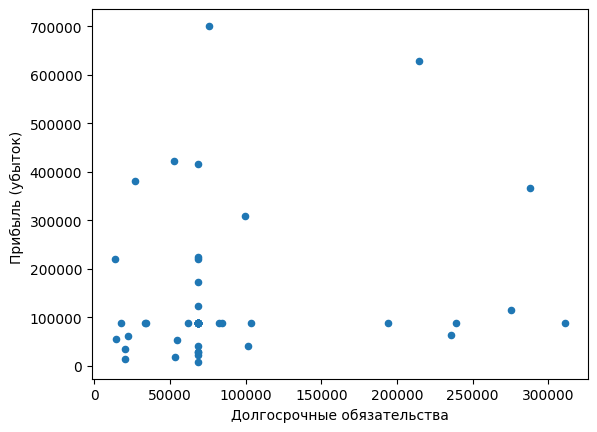

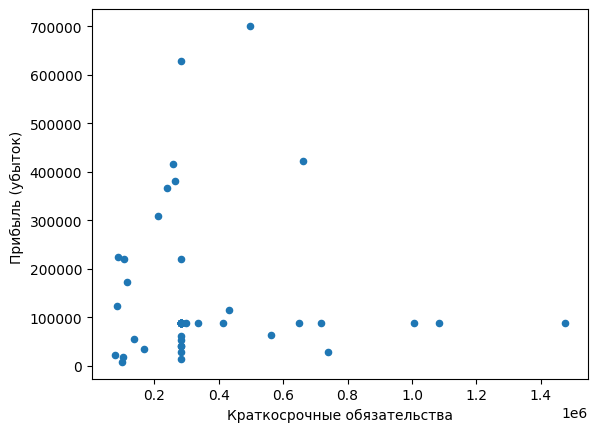

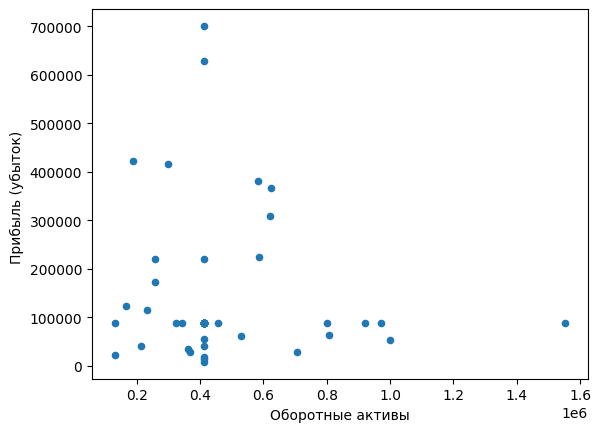

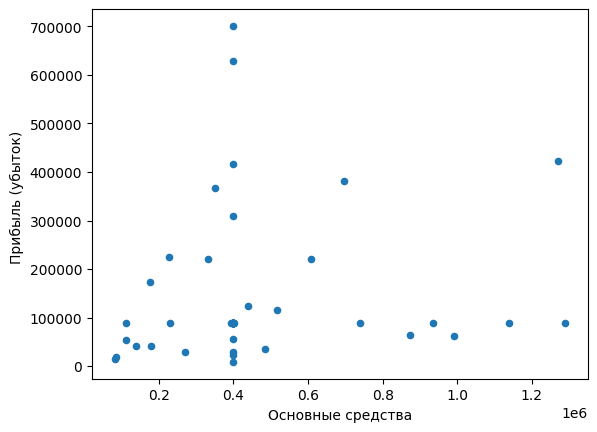

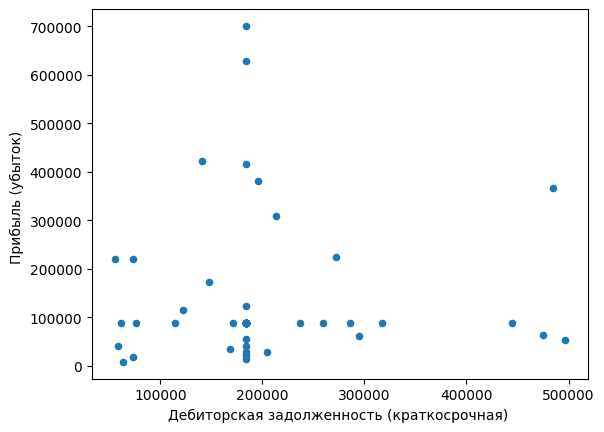

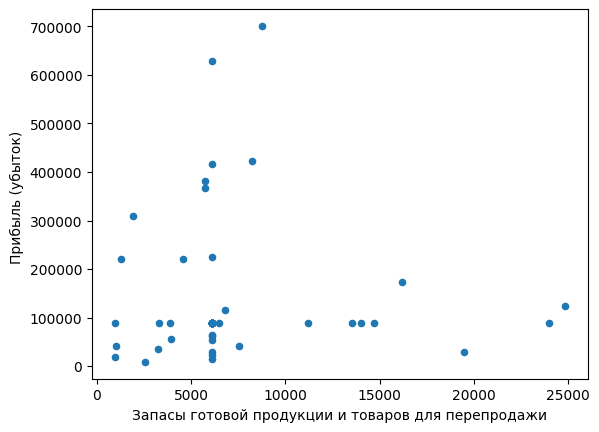

In [37]:
for i in for_gr_df.columns.values.tolist()[3:]:
    for_gr_df.plot.scatter(i, 'Прибыль (убыток) ')

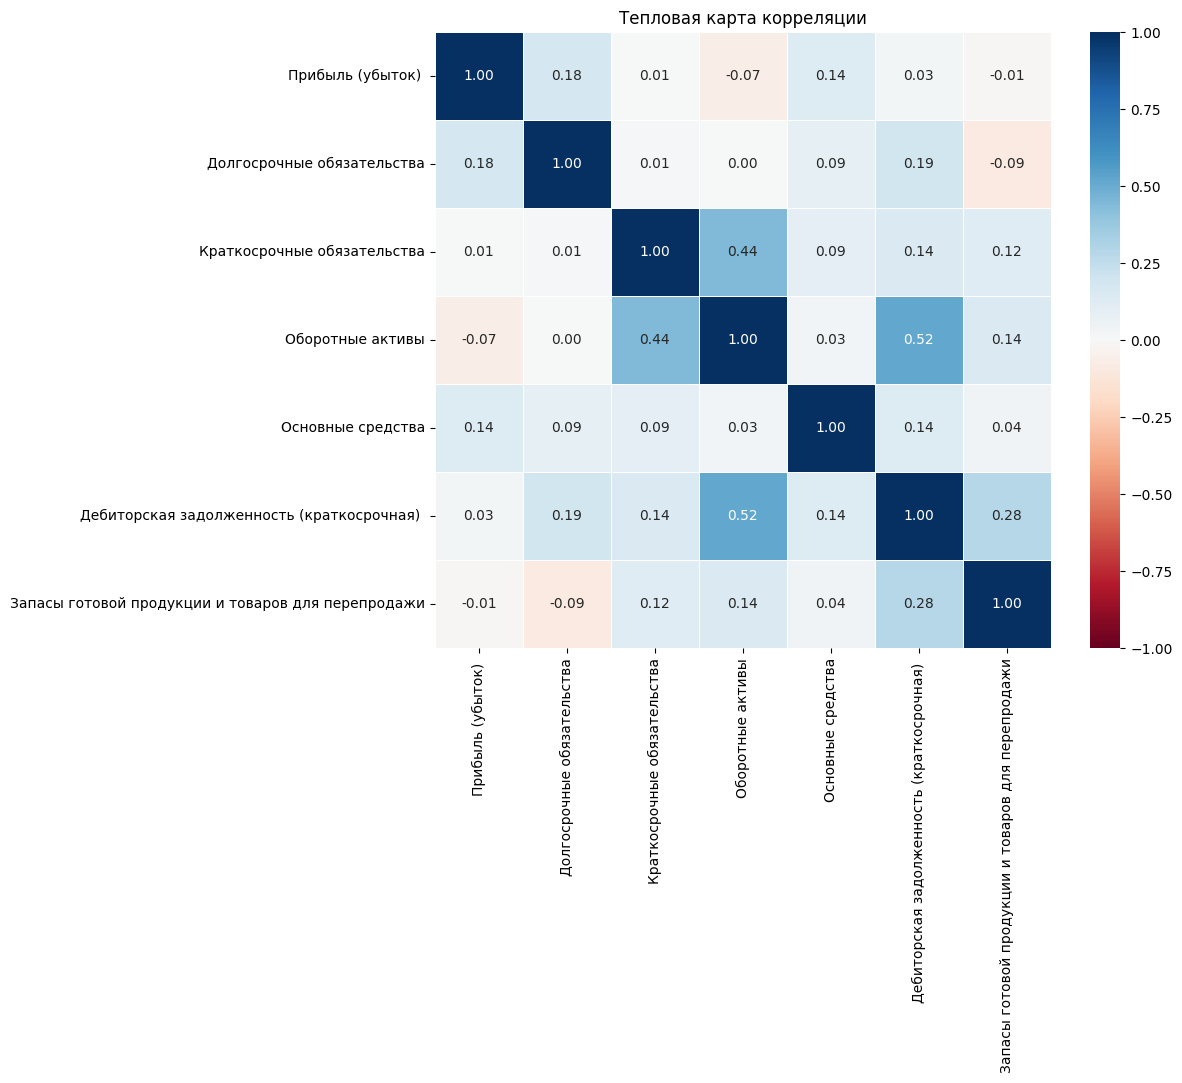

In [38]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(for_gr_df.iloc[::, 2:].corr(), annot=True, fmt=".2f", cmap="RdBu", vmin=-1, vmax=1, center=0, square=True, linewidths=.5, ax=ax)
plt.title("Тепловая карта корреляции")
plt.show()

In [39]:
import numpy as np
def linear_regression(X, y):
    m, c = np.polyfit(X, y, deg=1)
    return m, c

Уравнение регрессии: y = 0.370 * x + 102941.741


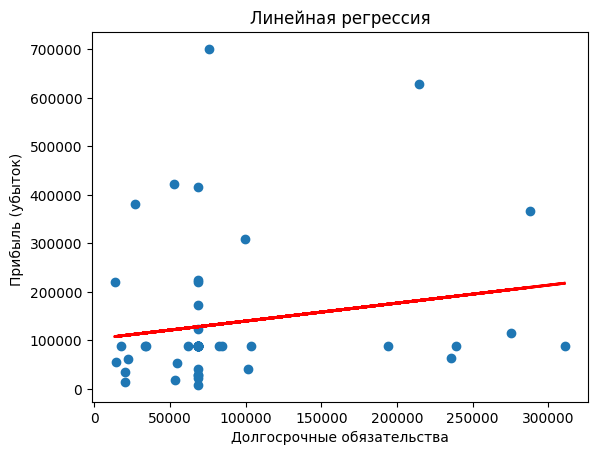

Уравнение регрессии: y = 0.003 * x + 133873.680


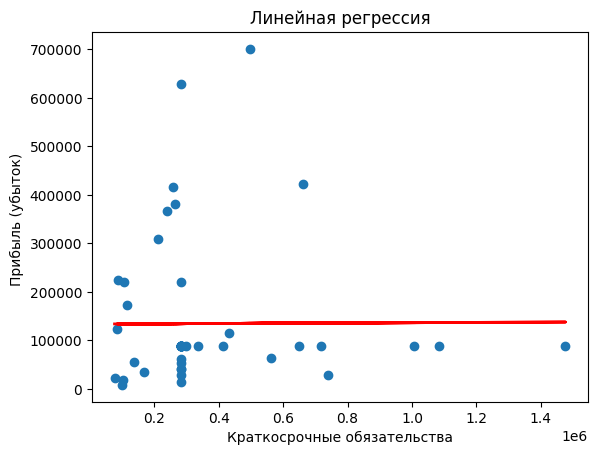

Уравнение регрессии: y = -0.040 * x + 153480.829


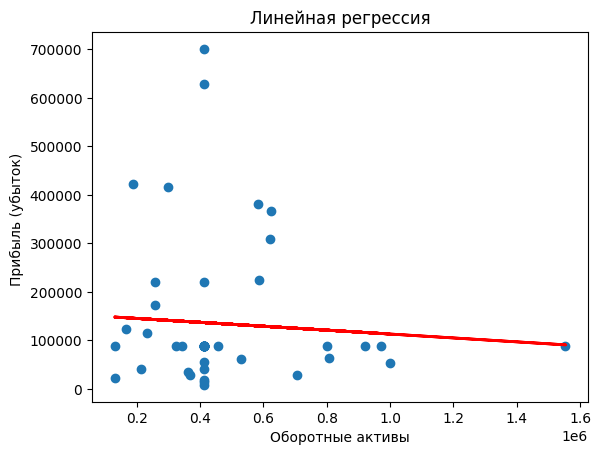

Уравнение регрессии: y = 0.074 * x + 101458.391


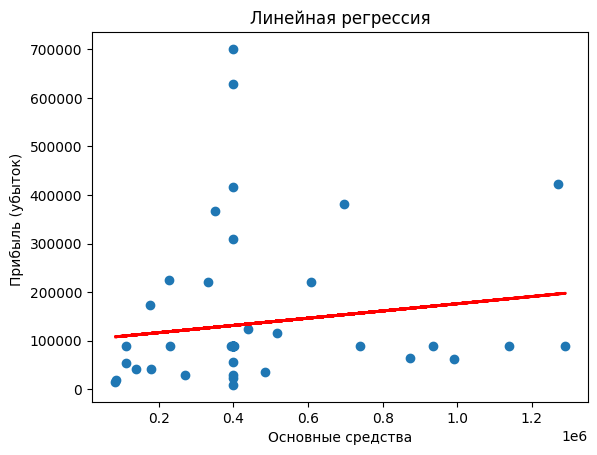

Уравнение регрессии: y = 0.046 * x + 125822.679


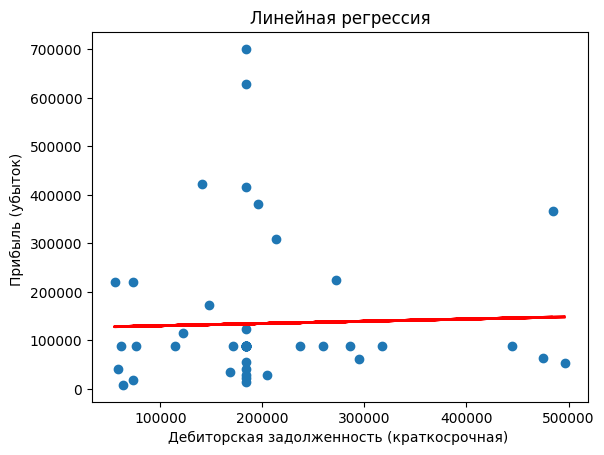

Уравнение регрессии: y = -0.343 * x + 137291.653


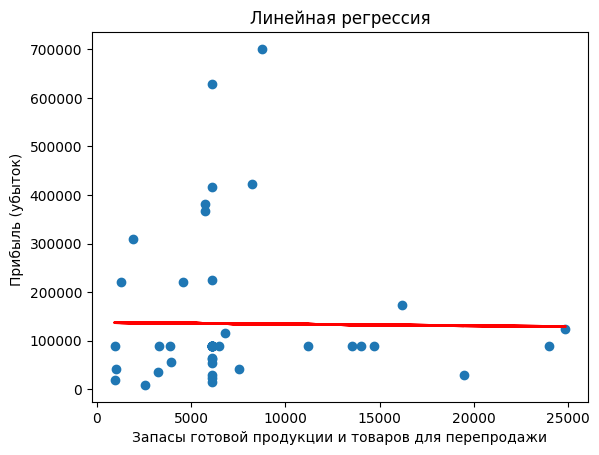

In [40]:
for i in for_gr_df.columns.values.tolist()[3:]:
    factor = for_gr_df[i]
    savings = for_gr_df['Прибыль (убыток) ']

    m, c = linear_regression(factor, savings)

    print("Уравнение регрессии: y = {:.3f} * x + {:.3f}".format(m, c))
    plt.scatter(factor, savings)
    plt.plot(factor, m * factor + c, color='red', linewidth=2)
    plt.title('Линейная регрессия')
    plt.xlabel(i)
    plt.ylabel('Прибыль (убыток) ')
    plt.show()

## Средние значения

In [41]:
for_gr_df = filtered_df.fillna(filtered_df.mean())
for_gr_df

/var/folders/kt/3wcg_rq11l33nyc3g98z7zlw0000gn/T/ipykernel_78795/3145015218.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  for_gr_df = filtered_df.fillna(filtered_df.mean())


,Добыча сырой нефти и природного газа; предоставление услуг в этих областях,№ п.п.,Прибыль (убыток),Долгосрочные обязательства,Краткосрочные обязательства,Оборотные активы,Основные средства,Дебиторская задолженность (краткосрочная),Запасы готовой продукции и товаров для перепродажи
0,NaN,NaN,183718.038462,61749.000000,1.007355e+06,5.169447e+05,5.027857e+05,211756.961538,8267.0
1,NaN,NaN,183718.038462,17532.000000,4.163360e+05,5.169447e+05,5.027857e+05,211756.961538,8267.0
2,NaN,NaN,13612.000000,20268.000000,4.163360e+05,5.169447e+05,8.107200e+04,211756.961538,8267.0
3,NaN,NaN,183718.038462,105037.192308,4.163360e+05,5.169447e+05,5.027857e+05,211756.961538,8267.0
4,NaN,NaN,183718.038462,105037.192308,4.163360e+05,5.169447e+05,5.027857e+05,211756.961538,8267.0
5,NaN,NaN,28973.000000,105037.192308,4.163360e+05,3.678800e+05,5.027857e+05,204181.000000,19474.0
6,NaN,NaN,183718.038462,311268.000000,4.163360e+05,5.169447e+05,7.404370e+05,211756.961538,8267.0
7,NaN,NaN,183718.038462,105037.192308,4.163360e+05,5.169447e+05,5.027857e+05,211756.961538,8267.0
8,NaN,NaN,628091.000000,214411.000000,4.163360e+05,5.169447e+05,5.027857e+05,211756.961538,8267.0
9,NaN,NaN,29204.000000,105037.192308,7.388110e+05,7.058770e+05,2.699080e+05,211756.961538,8267.0


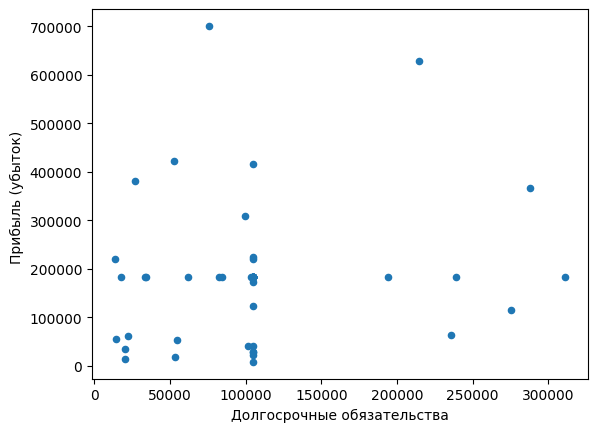

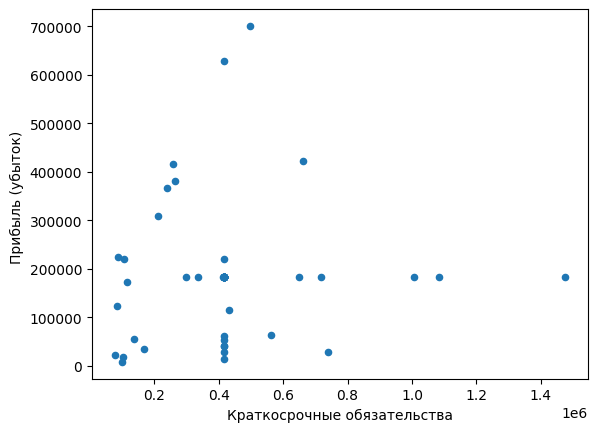

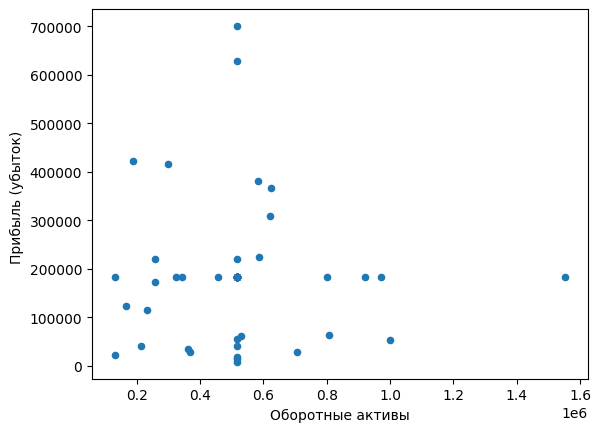

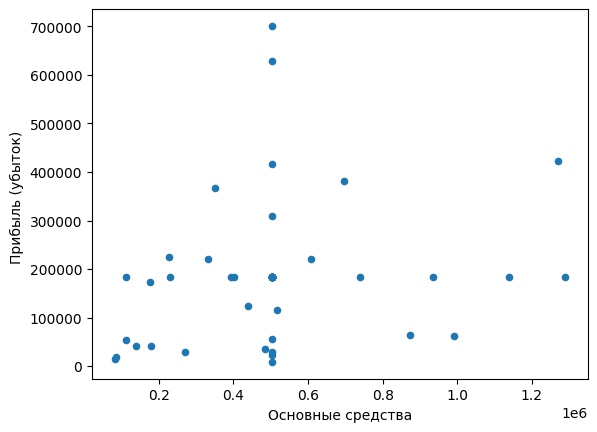

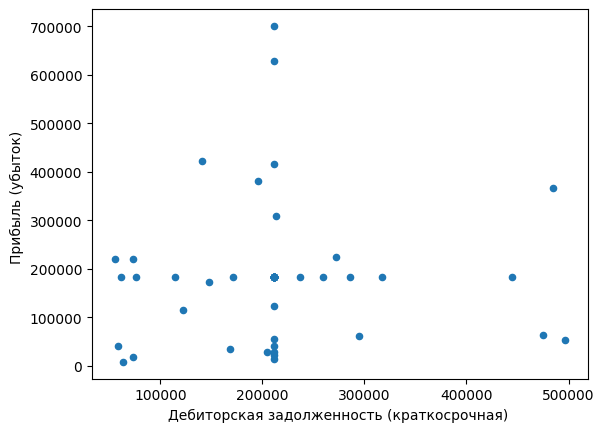

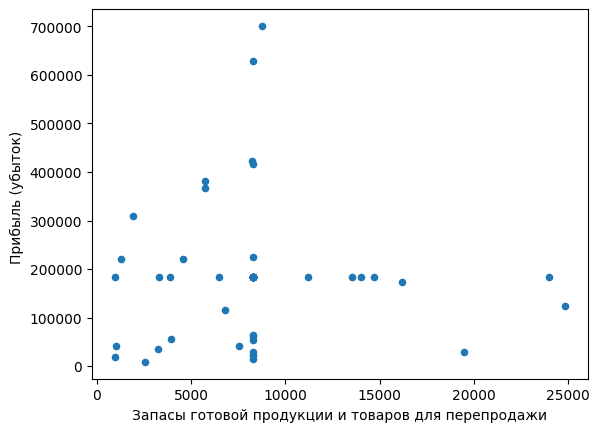

In [42]:
for i in for_gr_df.columns.values.tolist()[3:]:
    for_gr_df.plot.scatter(i, 'Прибыль (убыток) ')

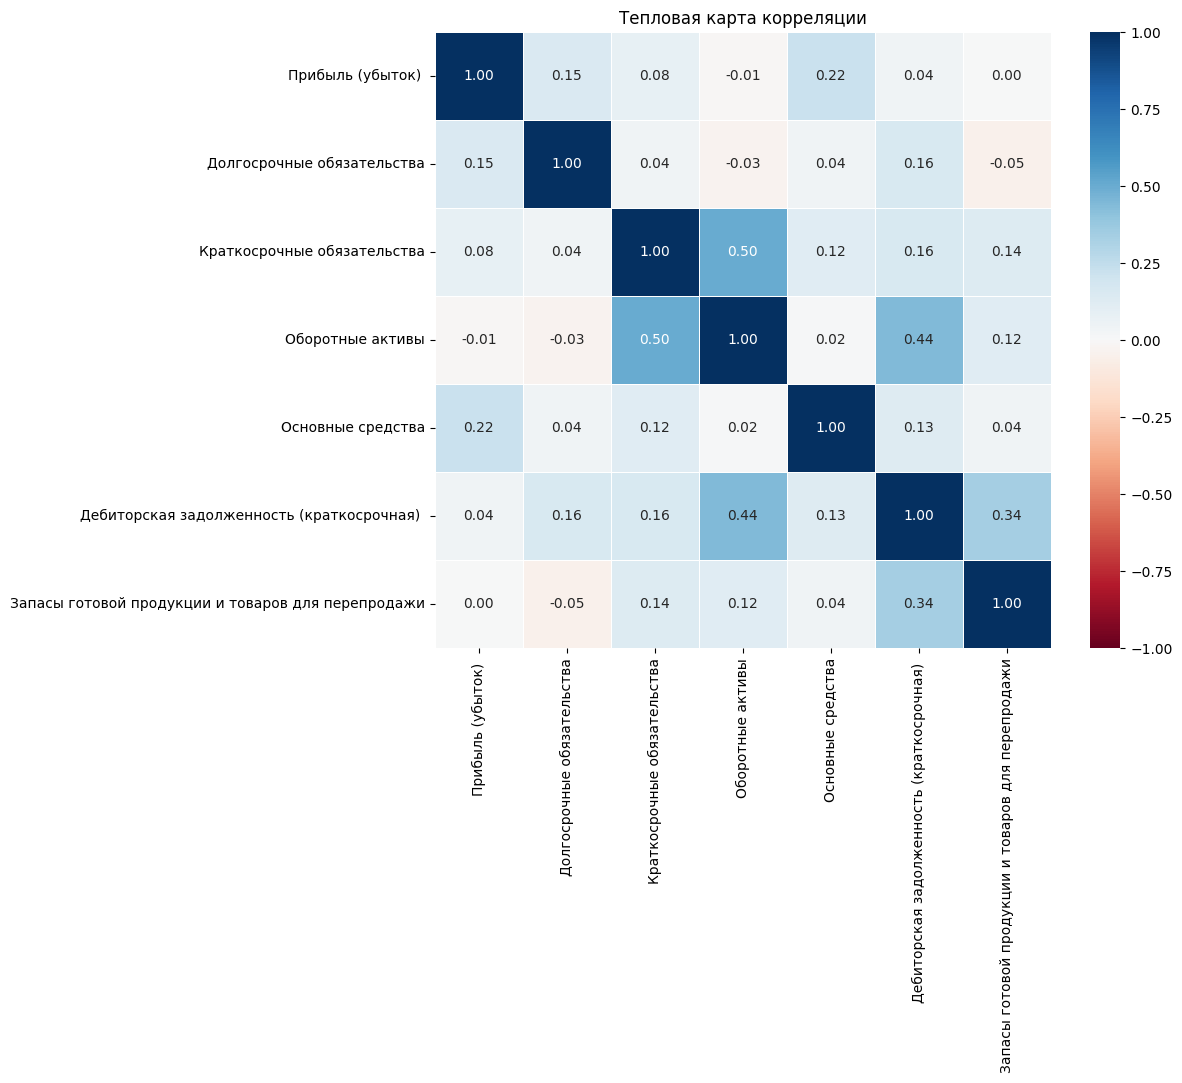

In [43]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(for_gr_df.iloc[::, 2:].corr(), annot=True, fmt=".2f", cmap="RdBu", vmin=-1, vmax=1, center=0, square=True, linewidths=.5, ax=ax)
plt.title("Тепловая карта корреляции")
plt.show()

Уравнение регрессии: y = 0.307 * x + 151482.261


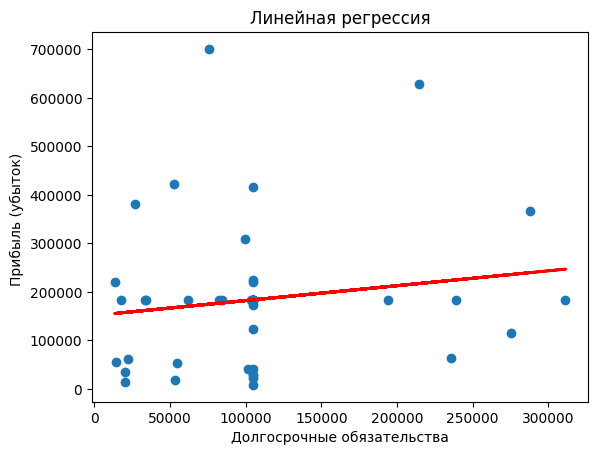

Уравнение регрессии: y = 0.043 * x + 165875.996


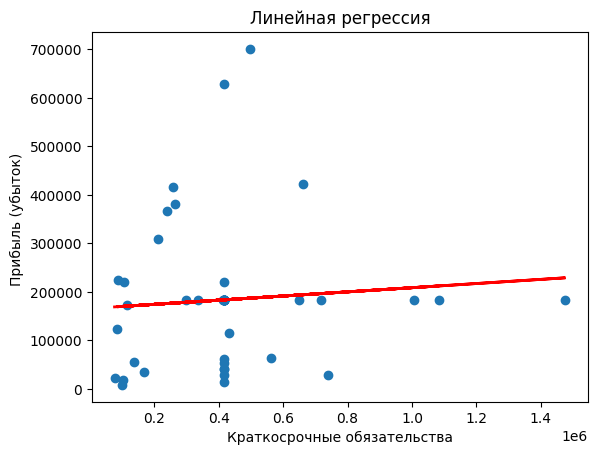

Уравнение регрессии: y = -0.009 * x + 188119.881


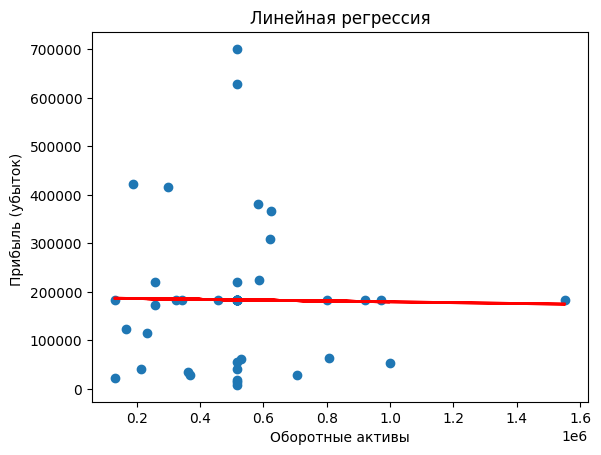

Уравнение регрессии: y = 0.115 * x + 125834.550


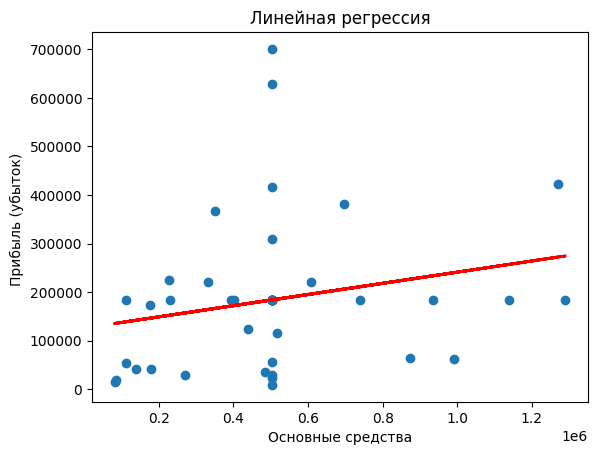

Уравнение регрессии: y = 0.056 * x + 171847.033


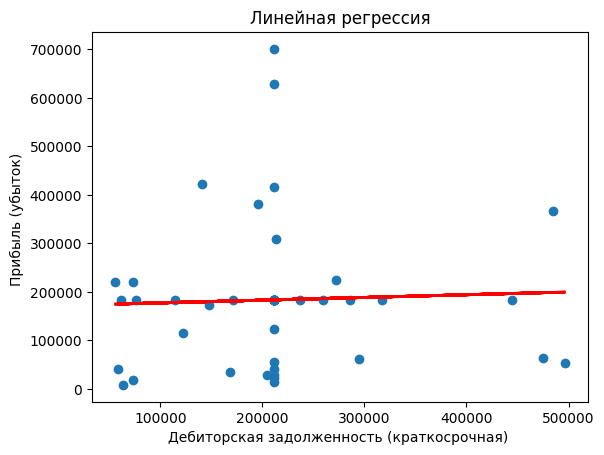

Уравнение регрессии: y = 0.013 * x + 183609.474


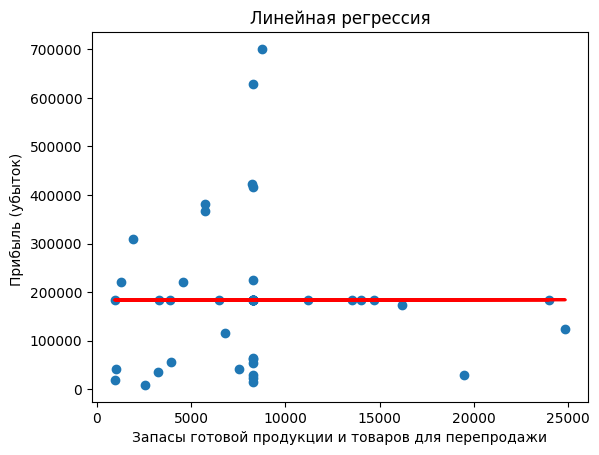

In [44]:
for i in for_gr_df.columns.values.tolist()[3:]:
    factor = for_gr_df[i]
    savings = for_gr_df['Прибыль (убыток) ']

    m, c = linear_regression(factor, savings)

    print("Уравнение регрессии: y = {:.3f} * x + {:.3f}".format(m, c))
    plt.scatter(factor, savings)
    plt.plot(factor, m * factor + c, color='red', linewidth=2)
    plt.title('Линейная регрессия')
    plt.xlabel(i)
    plt.ylabel('Прибыль (убыток) ')
    plt.show()